<a href="https://colab.research.google.com/github/Kiruthiya/workshop/blob/main/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
y_2018=pd.read_csv("/content/2018.csv")
y_2019=pd.read_csv("/content/2019.csv")
data=pd.concat([y_2018,y_2019],sort=False)
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,312.0,78.500000,45.104737,1.000,39.75000,78.5000,117.25000,156.000
Score,312.0,5.391506,1.114631,2.853,4.51425,5.3795,6.17600,7.769
GDP per capita,312.0,0.898298,0.394592,0.000,0.60950,0.9600,1.21950,2.096
Social support,312.0,1.211026,0.300310,0.000,1.05575,1.2655,1.45750,1.644
Healthy life expectancy,312.0,0.661295,0.252724,0.000,0.48825,0.6990,0.85800,1.141
Freedom to make life choices,312.0,0.423538,0.156024,0.000,0.32250,0.4495,0.54025,0.724
Generosity,312.0,0.182926,0.096739,0.000,0.10875,0.1755,0.24500,0.598
Perceptions of corruption,311.0,0.111299,0.095365,0.000,0.05000,0.0820,0.14050,0.457


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       312 non-null    float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     311 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 24.4+ KB


In [ ]:
data.rename(columns={
    "Overall rank": "rank",
    "Country or region": "country",
    "Score": "score",
    "GDP per capita": "gdp",
    "Social support": "social",
    "Healthy life expectancy": "healthy",
    "Freedom to make life choices": "freedom",
    "Generosity": "genorosity",
    "Perceptions of corruption": "corruption"
},inplace=True)
del data["rank"]

In [ ]:
data.columns[data.isnull().any()]

Index(['corruption'], dtype='object')

In [ ]:
data.isnull().sum()

,0
country,0
score,0
gdp,0
social,0
healthy,0
freedom,0
genorosity,0
corruption,1


In [ ]:
data[data["corruption"].isnull()]

,country,score,gdp,social,healthy,freedom,genorosity,corruption
19,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [ ]:
avg_data_corruption=data.loc[data["score"]>6.774,"corruption"].mean()

In [ ]:
data.loc[data["corruption"].isnull(), "corruption"]=avg_data_corruption

In [ ]:
data[data["corruption"].isnull()]

,country,score,gdp,social,healthy,freedom,genorosity,corruption


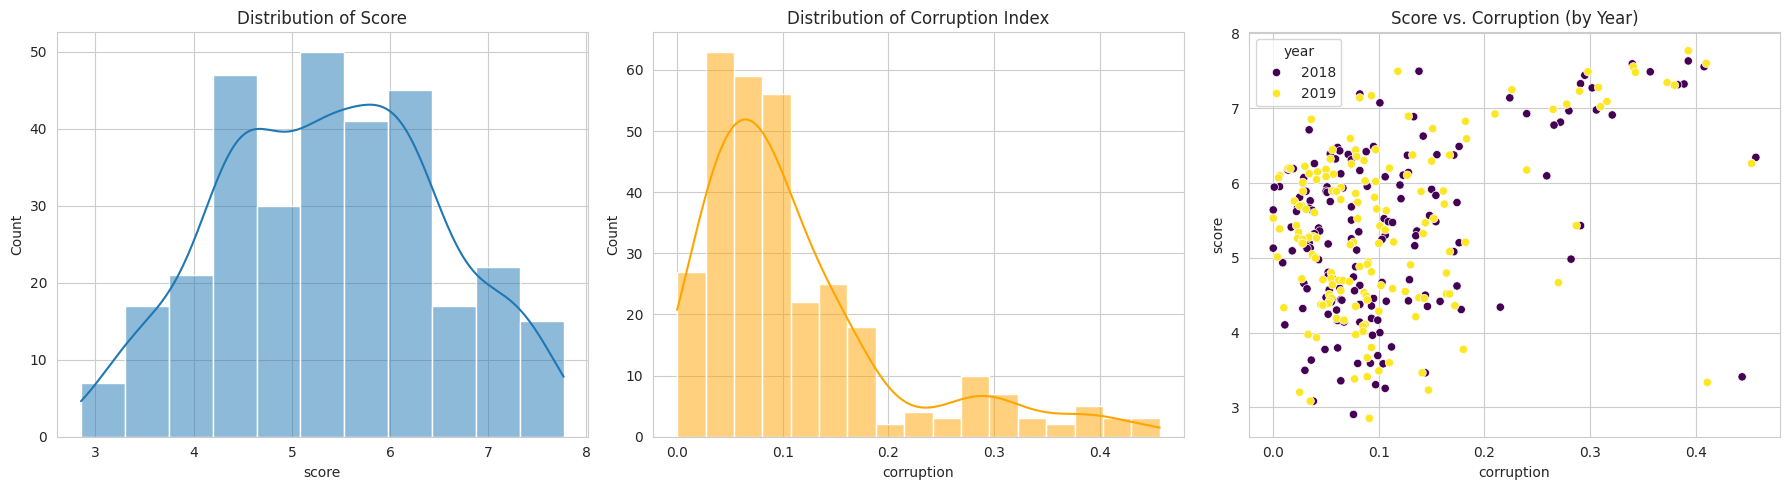


--- Correlation Matrix of Numerical Features ---
               score  corruption
score       1.000000    0.399129
corruption  0.399129    1.000000


In [ ]:
# Add a 'year' column to the 'data' DataFrame if it doesn't exist
# This assumes y_2018 and y_2019 are still available in the kernel with their original row counts.
if 'year' not in data.columns:
    data_length_2018 = len(y_2018)
    data['year'] = [2018] * data_length_2018 + [2019] * (len(data) - data_length_2018)

# Set a style for better visualization
sns.set_style("whitegrid")
plt.figure(figsize=(18, 5))

# Plot 1: Distribution of 'score'
plt.subplot(1, 3, 1)
sns.histplot(data['score'], kde=True)
plt.title('Distribution of Score')

# Plot 2: Distribution of 'corruption' (after imputation)
plt.subplot(1, 3, 2)
sns.histplot(data['corruption'], kde=True, color='orange')
plt.title('Distribution of Corruption Index')

# Plot 3: Scatter plot of Score vs. Corruption (to see relationship)
plt.subplot(1, 3, 3)
sns.scatterplot(x='corruption', y='score', data=data, hue='year', palette='viridis')
plt.title('Score vs. Corruption (by Year)')

plt.tight_layout()
plt.show()

# Print correlation matrix for numerical features
print("\n--- Correlation Matrix of Numerical Features ---")
print(data[['score', 'corruption']].corr())

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# 1. Feature Engineering: Create a binary target variable
# We will define a 'High_Score' if the score is above the overall mean score
mean_score = data['score'].mean()
data['High_Score'] = (data['score'] >= mean_score).astype(int)

# Identify feature types
numerical_features = ['corruption']
categorical_features = [] # Changed from ['region'] as 'region' column does not exist
# Note: 'year' and 'country' are left out

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    # Use sparse_output=False to get a dense array output, which is easier to convert to a DataFrame
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='drop'  # Drop all other columns (like 'score', 'year', 'country')
)

# Apply the preprocessing
X = data.drop(['score', 'High_Score'], axis=1) # Features
y = data['High_Score'] # Target

# Fit the preprocessor and Transform the features
X_processed = preprocessor.fit_transform(X)

# --- NEW/COMPLETING STEPS ---

# 1. Get the names of the one-hot encoded columns
# If categorical_features is empty, preprocessor.named_transformers_['cat'] might not exist
# Or it will return an empty list for get_feature_names_out
if categorical_features:
    feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
else:
    feature_names = numerical_features

# 2. Convert the processed array back into a DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)


# Display the results
print("\n--- Final Processed Feature DataFrame Head ---")
print(X_processed_df.head())
print(f"\nShape of final processed features (X_processed_df): {X_processed_df.shape}")
print(f"Number of new features created: {X_processed_df.shape[1] - len(numerical_features)}")


--- Final Processed Feature DataFrame Head ---
   corruption
0    2.945808
1    2.390599
2    3.102943
3    0.274520
4    2.568685

Shape of final processed features (X_processed_df): (312, 1)
Number of new features created: 0
